In [1]:
import json
import pandas as pd
import numpy as np
import tensorflow

In [2]:
df = pd.read_json("reps_diag.json", lines=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CoulombMatrix  1 non-null      object
 1   energy_U0      1 non-null      object
dtypes: object(2)
memory usage: 144.0+ bytes


In [4]:
# transform the Coulom Matrix into dataframe
df_x = df['CoulombMatrix']
df_x.item()

{'0': [-1.007043770659331,
  -0.06081569800240601,
  -0.060805118974341,
  -0.06079861303838201,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  40.047568400074454],
 '1': [-0.8836112598225451,
  -0.11784736439377001,
  -0.117753192168995,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  55.9779192161853],
 '2': [-0.702368200128893,
  -0.160782239799999,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
 

In [5]:
df_y = df['energy_U0']
df_y.item()

{'0': [-1101.4877929688],
 '1': [-1538.1477050781],
 '2': [-2079.0778808594],
 '3': [-2103.6694335938],
 '4': [-2541.8669433594],
 '5': [-3115.2578125],
 '6': [-2170.4931640625],
 '7': [-3147.7895507812],
 '8': [-3173.107421875],
 '9': [-3611.4448242188],
 '10': [-4184.7739257812],
 '11': [-4622.1474609375],
 '12': [-3239.5827636719],
 '13': [-4217.0229492188],
 '14': [-4216.6860351562],
 '15': [-3206.1760253906],
 '16': [-4183.5483398438],
 '17': [-5254.201171875],
 '18': [-5691.5146484375],
 '19': [-6128.587890625],
 '20': [-4308.71484375],
 '21': [-5286.2807617188],
 '22': [-4175.8549804688],
 '23': [-4613.9013671875],
 '24': [-5051.75390625],
 '25': [-5187.1606445312],
 '26': [-5625.1884765625],
 '27': [-6198.720703125],
 '28': [-4242.4985351562],
 '29': [-4242.1826171875],
 '30': [-4680.525390625],
 '31': [-5116.8852539062],
 '32': [-5219.4409179688],
 '33': [-5657.7041015625],
 '34': [-5253.84375],
 '35': [-5691.123046875],
 '36': [-6231.7827148438],
 '37': [-6231.2065429688],
 '

In [6]:
df_x = pd.DataFrame(list(df_x.item().values()), index=list(df_x.item().keys())).reset_index()

In [7]:
df_y = pd.DataFrame(list(df_y.item().values()), index=list(df_y.item().keys())).reset_index()

In [8]:
# Merge x and y
data = pd.merge(df_x, df_y, on='index',  how='left').drop('index',axis=1)

In [9]:
data.rename(columns={data.columns[0]: "0",data.columns[-1]: "y" }, inplace = True)

In [10]:
# in the dataset, column 0-39 are predictor, y is the target variable 'Energy_U0'
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,y
0,-1.007044,-0.060816,-0.060805,-0.060799,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,40.047568,-1101.487793
1,-0.883611,-0.117847,-0.117753,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,55.977919,-1538.147705
2,-0.702368,-0.160782,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,75.379845,-2079.077881
3,-0.953189,-0.226316,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.987343,67.908372,-2103.669434
4,-0.633618,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.420301,82.930130,-2541.866943


In [12]:
# data preprocessing - check correlation
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,y
0,1.000000,0.542733,0.404783,0.306842,0.232387,0.217498,0.253988,0.306248,0.326670,0.309701,...,0.031516,-0.046813,-0.040282,-0.089791,-0.057100,0.074986,0.170642,0.141396,0.352239,-0.214809
1,0.542733,1.000000,0.722693,0.605321,0.520612,0.474425,0.478096,0.516213,0.513480,0.460527,...,-0.227831,-0.258304,-0.277563,-0.165436,0.058576,0.235083,0.329072,0.248530,0.423879,-0.300419
2,0.404783,0.722693,1.000000,0.779140,0.669364,0.604637,0.588975,0.619830,0.610581,0.543244,...,-0.362987,-0.400090,-0.384929,-0.182252,0.126366,0.302409,0.367801,0.276561,0.429662,-0.314633
3,0.306842,0.605321,0.779140,1.000000,0.812512,0.709299,0.665392,0.672834,0.646890,0.575038,...,-0.455927,-0.482127,-0.445855,-0.176613,0.162551,0.309558,0.349499,0.275918,0.412885,-0.296531
4,0.232387,0.520612,0.669364,0.812512,1.000000,0.847871,0.773206,0.762702,0.720443,0.623353,...,-0.531581,-0.549900,-0.476321,-0.161210,0.162819,0.289392,0.317130,0.255439,0.386386,-0.262267
5,0.217498,0.474425,0.604637,0.709299,0.847871,1.000000,0.878784,0.846182,0.813354,0.725665,...,-0.573535,-0.567109,-0.448305,-0.141240,0.142338,0.266690,0.301070,0.244884,0.377240,-0.246976
6,0.253988,0.478096,0.588975,0.665392,0.773206,0.878784,1.000000,0.895255,0.848497,0.783202,...,-0.556803,-0.536545,-0.412135,-0.133045,0.125534,0.253351,0.297590,0.241942,0.391210,-0.252569
7,0.306248,0.516213,0.619830,0.672834,0.762702,0.846182,0.895255,1.000000,0.896486,0.805179,...,-0.525678,-0.520896,-0.412529,-0.145023,0.114772,0.261219,0.318052,0.256144,0.406943,-0.268506
8,0.326670,0.513480,0.610581,0.646890,0.720443,0.813354,0.848497,0.896486,1.000000,0.887233,...,-0.491011,-0.493678,-0.388429,-0.140244,0.103411,0.260518,0.328996,0.266191,0.412843,-0.279490
9,0.309701,0.460527,0.543244,0.575038,0.623353,0.725665,0.783202,0.805179,0.887233,1.000000,...,-0.446437,-0.440471,-0.336433,-0.130540,0.076223,0.226691,0.302608,0.246728,0.393299,-0.261090


In [13]:
# drop columns with correlation < 0.2
data = data.drop(columns=[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30])

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,y
0,-1.007044,-0.060816,-0.060805,-0.060799,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,40.047568,-1101.487793
1,-0.883611,-0.117847,-0.117753,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,55.977919,-1538.147705
2,-0.702368,-0.160782,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,75.379845,-2079.077881
3,-0.953189,-0.226316,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.987343,67.908372,-2103.669434
4,-0.633618,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.420301,82.930130,-2541.866943


In [16]:
pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,y
count,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,...,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000
mean,-0.935092,-0.791965,-0.635038,-0.478872,-0.334741,-0.211112,-0.122653,-0.072093,-0.043589,-0.024751,...,3.248139,6.482383,10.606970,16.161929,23.284429,33.218266,48.480739,70.457366,190.710629,-11198.682231
std,0.073853,0.108680,0.143260,0.160854,0.163932,0.142981,0.102067,0.067998,0.051094,0.039668,...,1.916373,2.218156,2.708941,3.214061,4.266812,6.303395,8.668293,10.206406,15.688088,1090.094394
min,-1.570428,-1.019178,-0.953057,-0.918131,-0.815258,-0.803182,-0.626054,-0.471174,-0.256484,-0.212384,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.047568,-19444.386719
25%,-0.983570,-0.865232,-0.732422,-0.566260,-0.456822,-0.332876,-0.163942,-0.121340,-0.074844,-0.051067,...,2.140414,5.195189,8.940671,14.356431,20.684593,29.006697,42.138226,63.859032,181.223625,-11916.245117
50%,-0.943368,-0.811867,-0.651317,-0.498908,-0.372945,-0.187260,-0.109766,-0.068156,-0.017234,0.000000,...,3.462053,6.721305,10.799702,16.404153,23.085429,32.547586,48.198940,70.464444,191.351499,-11370.679688
75%,-0.897034,-0.740551,-0.549111,-0.428051,-0.220436,-0.085000,-0.056525,0.000000,0.000000,0.000000,...,4.615938,7.935081,12.504806,18.069814,25.688754,36.914570,54.712527,77.189896,200.924008,-10532.144531
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.991772,13.994218,25.589040,53.814664,59.231536,71.456146,93.709668,123.168455,304.093129,-1101.487793


In [17]:
X = data.drop(columns='y')
y = data['y']

In [18]:
X.isnull().values.any()

False

In [19]:
y.isnull().values.any()

False

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
# Data Splitting
# Training the Support Vector Regression model on the Training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
#4 Fitting the Support Vector Regression Model to the dataset

In [21]:
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition
#so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [22]:
# Predicting the Test set Results
y_pred = regressor.predict(X_test)

In [23]:
# MSE is large
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,y_pred))

202300.34334680732


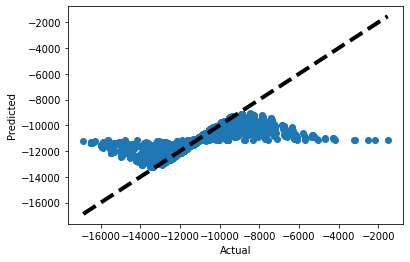

In [24]:
# plot actual vs. predicted energy, with dashed line indicating where actual = predicted, showing that 
# model cannot predict accurately when actual is very small or very large
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()